# Capstone Project

Reuben Hough

In [1]:
# Importing Libraries
import pandas as pd
import pandas.util.testing as tm
from pandas import DataFrame
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os
%matplotlib inline
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from numpy import random
import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX as SX
from statsmodels.tsa.seasonal import seasonal_decompose as decomp
from statsmodels.tsa.stattools import adfuller
import itertools
register_matplotlib_converters()
from time import time
import math
from fbprophet import Prophet

<ipython-input-1-e1ef54be840b>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Observation and Cleaning

In [2]:
# This function displays all columns when looking at the data
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [3]:
# Assigning all csv files to a variable
data = ["AllstarFull.csv","Appearances.csv","AwardsManagers.csv",
        "AwardsPlayers.csv","AwardsShareManagers.csv","AwardsSharePlayers.csv",
        "Batting.csv","BattingPost.csv","CollegePlaying.csv",
        "Fielding.csv","FieldingOF.csv","FieldingOFsplit.csv",
        "FieldingPost.csv","HallOfFame.csv","HomeGames.csv","Managers.csv",
        "ManagersHalf.csv","Parks.csv","People.csv","Pitching.csv",
        "PitchingPost.csv","Salaries.csv","Schools.csv","SeriesPost.csv",
        "Teams.csv","TeamsFranchises.csv","TeamsHalf.csv"]

In [4]:
# Creating a dictionary for filenames
dictum = {}
files = {}
for x in data:
    dictum[x] = pd.read_csv(x)
for x in dictum:
    # Removing all ".csv" and making lowercase
    cleaned = os.path.basename(x).replace('.csv', '')
    # Re-reading files after name change
    df = pd.read_csv(x)
    # Adding to "files" dictionary
    files[cleaned] = df

In [5]:
display_all(files['People'])

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20085,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20086,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20087,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20088,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


This dataset consists of over twenty thousand Major League Baseball players from 1871 to 2019.

This dataset is from Kaggle, however they did not provide complete and accurate information, so I searched for the source of the information which I then copied into this repository.

In [6]:
P = files['People'].copy()
P.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20090 entries, 0 to 20089
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      20090 non-null  object 
 1   birthYear     19976 non-null  float64
 2   birthMonth    19808 non-null  float64
 3   birthDay      19666 non-null  float64
 4   birthCountry  20029 non-null  object 
 5   birthState    19535 non-null  object 
 6   birthCity     19918 non-null  object 
 7   deathYear     9844 non-null   float64
 8   deathMonth    9843 non-null   float64
 9   deathDay      9842 non-null   float64
 10  deathCountry  9840 non-null   object 
 11  deathState    9790 non-null   object 
 12  deathCity     9834 non-null   object 
 13  nameFirst     20053 non-null  object 
 14  nameLast      20090 non-null  object 
 15  nameGiven     20053 non-null  object 
 16  weight        19273 non-null  float64
 17  height        19353 non-null  float64
 18  bats          18910 non-nu

For my purpose many of these categories will not be very useful, for example when and where some of these people died. There is also many missing values in those categories.

In [7]:
P.drop(['deathYear','deathMonth','deathDay','deathCountry',
            'deathState','deathCity','retroID','bbrefID'], axis=1, inplace=True)

In [8]:
People = P.copy()
People = People.loc[ : ,['playerID','birthYear','birthMonth',
                         'debut','finalGame']]

The next thing to do is to get more information from the data. First I'm going to calculate how old each player was when they started playing, how long they played, and how old they were at retirement.

In [9]:
# There are relatively few N/A values, they can be dropped for now
People = People.dropna()

In [10]:
# Here I'm separating the years and months to make them easier to work with
People['debutYear'] = People['debut'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[:4]))
People['debutYear'] = People['debutYear'].apply(lambda x: int(x))
People['debutMonth'] = People['debut'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[-5:-3]))
People['debutMonth'] = People['debutMonth'].apply(lambda x: int(x))
People['finalYear'] = People['finalGame'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[:4]))
People['finalYear'] = People['finalYear'].apply(lambda x: int(x))
People['finalMonth'] = People['finalGame'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[-5:-3]))
People['finalMonth'] = People['finalMonth'].apply(lambda x: int(x))
People.drop(['debut','finalGame'], axis=1, inplace=True)

In [11]:
# This function turns the year and month columns into one value
def Months(df, ycol, mcol):
    z = []
    for x in df.index:
        z.append(12*(df['{}'.format(ycol)][x]) + (df['{}'.format(mcol)][x]))
    return z

In [12]:
start = Months(People, 'debutYear', 'debutMonth')
born = Months(People, 'birthYear', 'birthMonth')
final = Months(People, 'finalYear', 'finalMonth')

In [13]:
# This function subtracts the items of one list from another
def ToYears(list1, list2):
    z = []
    for x in list(range(len(list1))):
        z.append(round((list1[x] - list2[x])/12,2))
    return z

In [14]:
People['startingAge'] = ToYears(start,born)
People['timePlayed'] = ToYears(final,start)
People['endingAge'] = ToYears(final,born)

In [15]:
People = People.loc[ : ,['playerID','startingAge','timePlayed','endingAge']]

In [16]:
# Merging back to the original dataset, keeping N/A values for now
df = P.merge(People, how='left', on="playerID")

### Player Awards

In [17]:
AwardsPlayers = files['AwardsPlayers'].copy()
print(''.join((f"There have been {AwardsPlayers.shape[0]} awards ", 
f"given to {AwardsPlayers.nunique()[0]} players")))

There have been 6236 awards given to 1360 players


In [18]:
# That's less that 7 percent of the total,
# this should be useful in finding the best players
100*1360/20090

6.769537083125933

In [19]:
# This will let me make a simple plot and put in variables as needed
def toplot(dataframe, column, b, title="Title",xlabel="X Label Here",
            ylabel="Y Label Here", kind="line", color="skyblue"):
    mean = dataframe['{}'.format(column)].mean()
    median = dataframe['{}'.format(column)].median()
    ax = dataframe['{}'.format(column)].plot(kind=kind, bins=b, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)

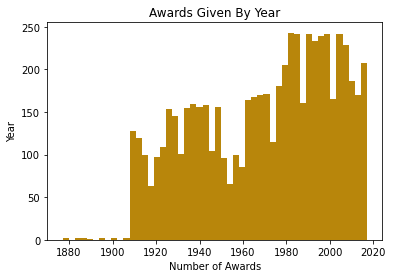

In [20]:
toplot(AwardsPlayers, 'yearID', 50, "Awards Given By Year",
        "Number of Awards", "Year", "hist", "darkgoldenrod")

Few awards were given out in the early years, presumably baseball was not as mainstream at the time. The MVP award began in 1910, the same time as the obvious increase.

There's also a clear dip in awards given shortly after WWII. I suspect this may be related to integration which was happening around that time, so this may be a sensitive issue to look into.

In [21]:
AwardsPlayers.sort_values(by='yearID')

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN
...,...,...,...,...,...,...
6183,arenano01,Silver Slugger,2017,NL,NaN,3B
6182,murphda08,Silver Slugger,2017,NL,NaN,2B
6181,goldspa01,Silver Slugger,2017,NL,NaN,1B
6179,cruzne02,Silver Slugger,2017,AL,NaN,DH


In [22]:
# Turning the players and awards into a dataframe
APNames = AwardsPlayers['playerID'].value_counts(dropna=False).index.tolist()
APAward = AwardsPlayers['playerID'].value_counts(dropna=False).tolist()

In [23]:
Awards = DataFrame([APNames,APAward]).transpose()
Awards.columns = ['playerID','awards']

Text(0, 0.5, 'Number of Awards')

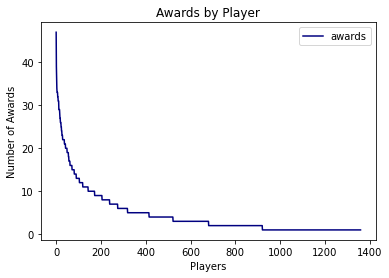

In [24]:
bx = Awards.plot(color="navy", title="Awards by Player")
bx.set_xlabel("Players")
bx.set_ylabel("Number of Awards")

In [25]:
# Merging awards with main dataframe
df = df.merge(Awards, how='left', on="playerID")

In [26]:
# Replacing NaN awards with zero
df.awards.replace(np.NaN, 0, inplace=True)

### Batting Scores

In [27]:
# Reading data
B = DataFrame(files['Batting'].copy())
B1 = DataFrame(files['Batting'].copy())
# To avoid dividing by zero I'm going to eliminate every entry where a player didn't get a hit
NoHits = B1[B1['H'] == 0].index
B1.drop(NoHits, inplace = True)
# Copying dataframe into a smaller piece to make it easier and faster to work with
B1 = B1.loc[ : ,['playerID','AB', 'H']]

In [35]:
# Here is a function to return the batting average for each player
def BatAVG(df):
    IDs = []
    AB = []
    Hits = []
    AVG = []
    for x in df['playerID'].unique():
        Player = df.loc[df['playerID'] == x]
        IDs.append(x)
        AB.append(sum(Player['AB']))
        Hits.append(sum(Player['H']))
        try:
        # Adding in an exception for dividing by zero just in case
            AVG.append((sum(Player['AB']))/(sum(Player['H'])))
        except:
            AVG.append(0)
    data = {'playerID':IDs, 'battingAverage':AVG, 'totalAtBats':AB, 'totalHits':Hits}
    NewDF = pd.DataFrame(data)
    return NewDF, AVG, AB, Hits

In [33]:
AVGDF, Averages, AtBats, Hits = BatAVG(B1)

NameError: name 'a' is not defined

In [ ]:
BatAVG(B)[0]

In [ ]:
rounded = round((B1.shape[0])/(B.shape[0]), 3)
print(rounded*100)


Here I'm going to calculate the career batting average for each player.

In [ ]:
try:
  type(cncvn)
except NameError:
  print("Variable is not defined")
except:
  print("Something else went wrong")

In [ ]:
def BatAVG(df, AB, Hits):
    for x in B1['playerID'].unique():
        Player = B1.loc[B1['playerID'] == x]
        y = sum(Player['AB'])
        z = sum(Player['H'])
        w = y/z
    return w, x, y, z

In [ ]:
B1['playerID'].unique()

In [ ]:
sum(Hank['AB'])

In [ ]:
Hank = B.loc[B['playerID'] == 'aaronha01']
sum(Hank['AB'])

In [ ]:
type(Hank)

In [ ]:
TotalAB = DataFrame(B1['AB'].groupby(B1['playerID']))
TotalH = DataFrame(B2['H'].groupby(B2['playerID']))
print(len(TotalH))
print(len(TotalAB))

In [ ]:
TotalAB[0]

In [ ]:
# This function returns the batting average by dividing at bats by hits
def Bat(df, atbats, hits):
    a = []
    for x in df.index:
        b = df['{}'.format(atbats)][x]
        c = df['{}'.format(hits)][x]
        try:
            b / c
        except ZeroDivisionError:
            a.append(0)
    return a

In [ ]:
B['AVG'] = Bat(B, "AB", "H")

In [ ]:
B.head()